In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')

In [10]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [11]:
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
st = StandardScaler()
scaled_x = st.fit_transform(X)
scaled_y = st.fit_transform(y)

In [14]:
scaled_x[:5]

array([[2.40886829],
       [0.28535333],
       [1.72023489],
       [0.39235214],
       [1.4897759 ]])

In [17]:
# slope = 0
# inter = 0

In [31]:
epochs = 200
alpha = 0.01

In [32]:
def gradient(x,y):
    slope = 0
    inter = 0
    n = len(x)
    for i in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_slope = (2/n) * np.dot(loss.T, x)
        grad_inter = (2/n) * np.sum(loss)
        
        slope = slope - grad_slope * alpha
        inter = inter - grad_inter * alpha
        
    return slope, inter

In [33]:
slope, inter = gradient(scaled_x, scaled_y)

In [34]:
slope, inter

(array([[0.78550692]]), -2.9036313906483397e-16)

In [35]:
predictions = []
n = len(X)
for i in range(n):
    y_pred = slope[0][0] * scaled_x[i] + inter
    predictions.append(y_pred)

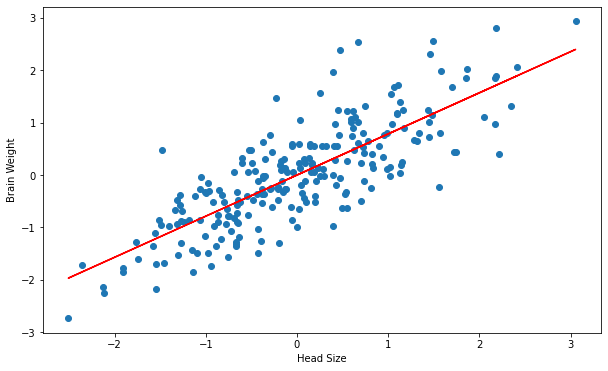

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(scaled_x, scaled_y)
plt.plot(scaled_x, predictions, color='red')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.show()